In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [21]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
all_rats = []
solvers = {}
rats = {}
ratname = 'VirtualRat'
print ratname
model = SimplePolicyNetwork(hidden_dim=5,reg=0, noise_factor = 0)
rat = SimRat(model)
box = simpleBox(mode="alternative",length=10000,block_size=30,random_range=0,
                trial_per_episode=40, repeat = True, reward_ratio = 1, p2a = 0.5, correction = True)
solver = SimpleRLPolicyGradientSolver(model, box,
                                    update_rule='adam',
                                    optim_config={
                                        'learning_rate': 5e-3,
                                        'decay_rate': 1
                                    },
                                    init_rule='xavier',
                                    num_episodes=601,
                                    verbose=False,
                                    supervised = True,
                                    stop = False,
                                    print_every=50)
#solver.load_params(loaded_params)
solver.init()
solver.set_temperature(3.0)
rats[ratname] = rat

solver.train()


VirtualRat
Episode 50 complete (0.15s), loss: 2175.25099663, reward: -10, running reward: -15.0118911732
Episode 100 complete (0.14s), loss: 1476.54749174, reward: -2, running reward: -9.81669342866
Episode 150 complete (0.20s), loss: 1359.25693017, reward: 8, running reward: -4.54784785129
Episode 200 complete (0.13s), loss: 1199.14588686, reward: -2, running reward: -2.97328521751
Episode 250 complete (0.12s), loss: 817.524197721, reward: 8, running reward: 4.3095700966
Episode 300 complete (0.14s), loss: 738.220519305, reward: 14, running reward: 10.0163743574
Episode 350 complete (0.16s), loss: 490.407772385, reward: 24, running reward: 19.981927884
Episode 400 complete (0.21s), loss: 258.257183831, reward: 22, running reward: 24.717596658
Episode 450 complete (0.20s), loss: 92.6508857996, reward: 30, running reward: 32.1325088032
Episode 500 complete (0.15s), loss: 40.1607105057, reward: 38, running reward: 37.0846553924
Episode 550 complete (0.12s), loss: 36.5890572024, reward: 4

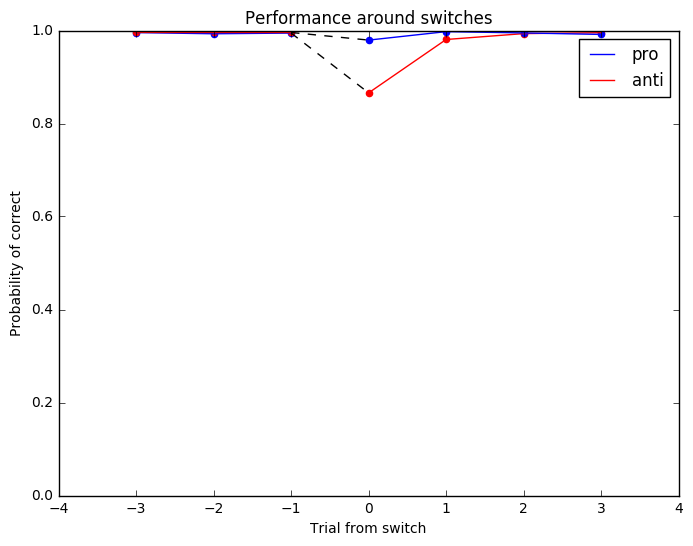

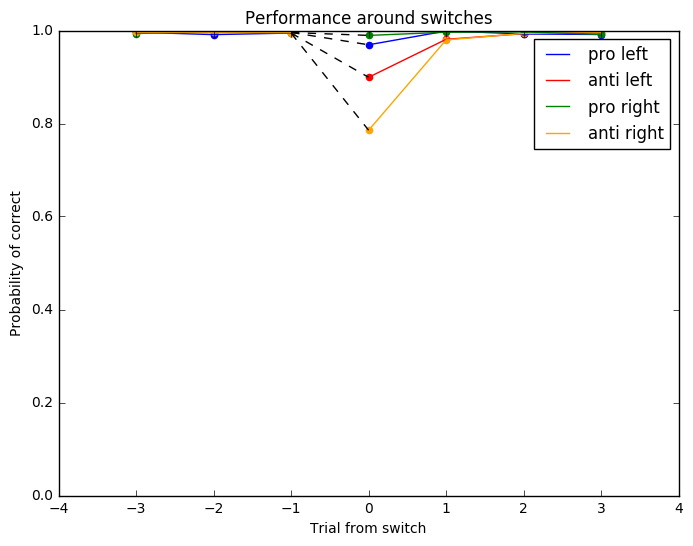

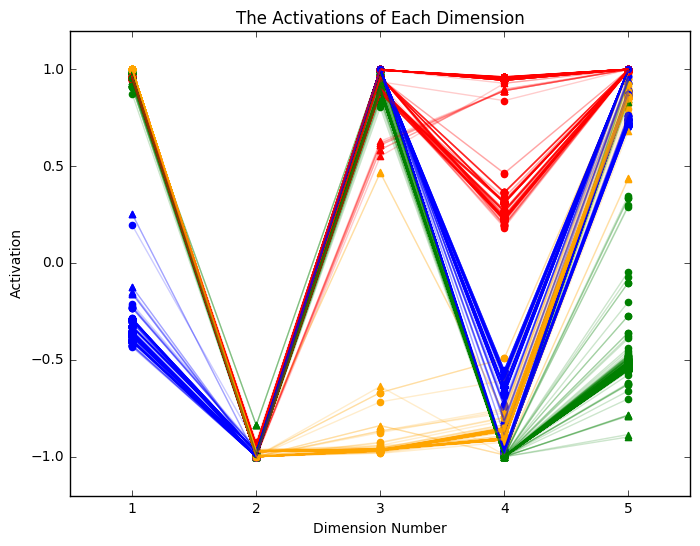

In [22]:
probs = rat.predict(val_X,val_y)
trial_window = 3
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)
draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)
parallel_coordinate(model.activation_history.asnumpy(), start = 0, end = 1000)
solvers[ratname] = solver
rat.addHistory(box.output_history())
rat.computeLearningCurve()